# Spam Email detection Neural Networks
Prepared By Deepa Francis<br>
For BrainStation<br>
On July 31, 2023

# Table of Contents
[1. Configuring Resources](#cr) <br>
- [1.1. Set up Libraries](#sl) <br>
- [1.2. Load Data](#ld) <br>

[2. Neural Network](#nn) <br>
- [2.1. Architecture](#nnr) <br>
- [2.2. TF-IDF model evaluation](#tf) <br>
- [2.3. Sentence2vec model evaluation](#sv) <br>
- [2.4. Best Model](#bm) <br>

[3. Findings](#fd) <br>
[4. Conclusion](#con) <br>

<a id = "cr"></a>
## 1. Configuring Resources

We are going to configure resources for comparing the performance metrics of neural network models on our dataset.

<a id = "sl"></a>
### 1.1. Setting up Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

<a id = "ld"></a>
### 1.2. Load Data

In [14]:
# Load the data
X_train = pd.read_csv('X_train.csv') 
X_test = pd.read_csv('X_test.csv') 
X_validation = pd.read_csv('X_validation.csv') 

X_train_Vec = pd.read_csv('X_train_Vec.csv') 
X_test_Vec = pd.read_csv('X_test_Vec.csv') 
X_val_Vec = pd.read_csv('X_val_Vec.csv')

y_train = pd.read_csv('y_train.csv') 
y_test = pd.read_csv('y_test.csv') 
y_validation = pd.read_csv('y_validation.csv') 

In [15]:
# Check the shapes of the datasets
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of X_validation is {X_validation.shape}')
print('')
print(f'The shape of X_train_Vec is {X_train_Vec.shape}')
print(f'The shape of X_test_Vec is {X_test_Vec.shape}')
print(f'The shape of X_val_Vec is {X_val_Vec.shape}')
print('')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of y_test is {y_test.shape}')
print(f'The shape of y_validation is {y_validation.shape}')

The shape of X_train is (22400, 228)
The shape of X_test is (12000, 228)
The shape of X_validation is (5600, 228)

The shape of X_train_Vec is (22400, 428)
The shape of X_test_Vec is (12000, 428)
The shape of X_val_Vec is (5600, 428)

The shape of y_train is (22400, 1)
The shape of y_test is (12000, 1)
The shape of y_validation is (5600, 1)


<a id = "nn"></a>
## 2. Neural Network

The main objective is to compare the performance of the neural network when using two different text representation methods: TF-IDF Vectorizer and Sentence to Vec. The comparison will involve training the neural network with data represented using both approaches and evaluating its performance using the chosen performance metrics.

Each approach may have its strengths and weaknesses depending on the nature of the text data and the complexity of the task at hand. By evaluating the neural network's performance under both methods, we can determine which representation technique yields better results for the given scenario.

<a id = "nnr"></a>
### 2.1. Architecture

**Create a Neural Network**
- First we create a sequential model. A sequential model is a linear stack of layers. In this case, the model will be built layer-by-layer.

- The model has three hidden layers, each followed by dropout regularization and batch normalization.

    - Dense: The dense layer is a fully connected layer with 40 neurons. The activation function used is ReLU (Rectified Linear Unit), which helps introduce non-linearity into the model.
    - Dropout: Dropout is a regularization technique that randomly drops out a fraction (0.2 in this case) of the neurons during training, which helps prevent overfitting.
    - BatchNormalization: Batch normalization normalizes the inputs of each layer to have zero mean and unit variance, which helps stabilize training and improves the learning process.

- The output layer is a dense layer with a single neuron, using the sigmoid activation function. Since this is a binary classification problem (spam or not spam), the sigmoid activation function outputs a probability between 0 and 1, indicating the likelihood of an email being spam.

- The model is compiled with the Adam optimizer, Binary Crossentropy loss function (suitable for binary classification), and Binary Accuracy metric (used to monitor the accuracy during training).

- The model is trained using the fit method with the training data (X_train, y_train). It will undergo 500 epochs (iterations over the entire dataset), and verbose=0 means the training progress won't be printed to the console.

- After training, the model is evaluated on both the validation and test datasets. The training accuracy is extracted from the training history, and the evaluation results (loss and accuracy) for the validation and test datasets are obtained.

- Then we do the predictions on the test data using the trained model. The predicted probabilities are rounded to obtain binary predictions (0 or 1). The true labels (y_test) are converted to integers (0 or 1). Finally, the classification report is printed for the test data, providing a comprehensive summary of the model's performance in classifying spam emails on the test dataset. The classification report includes metrics like precision, recall, F1-score, and support for both classes (spam and not spam).

<a id = "tf"></a>
### 2.2. TF-IDF Model Evaluation

Here we are going to train the model created according to the model architecture explained using the dataset that has been TF-IDF vectorised for the email messages.

In [16]:
# random seeds for reproducibility
tf.random.set_seed(123)

# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu")) 
model.add(layers.Dropout(0.2))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the network
history = model.fit(X_train, y_train, epochs=500, verbose=0)

# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result1 = model.evaluate(X_validation,y_validation, verbose=0)
result2 = model.evaluate(X_test,y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {result1[1]:.4f}")
print(f"Test Accuracy: {result2[1]:.4f}")

y_test_pred = model.predict(X_test)
y_test_pred = np.round(y_test_pred).flatten()
y_test = np.asarray(y_test, dtype=int)

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9736
Validation Accuracy: 0.9182
Test Accuracy: 0.9231
375/375 [==============================] - 0s 824us/step
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      6000
           1       0.91      0.94      0.92      6000

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [18]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted non-spam", "Predicted spam"],
    index=["True non-spam", "True spam"]
)

display(cf_df)

,Predicted non-spam,Predicted spam
True non-spam,5454,546
True spam,377,5623


Out of 6000 non-spam (legitimate) emails, the model correctly predicted 5454 as non-spam and incorrectly classified 546 as spam.
Out of 6000 spam emails, the model correctly predicted 5623 as spam and misclassified 377 as non-spam.

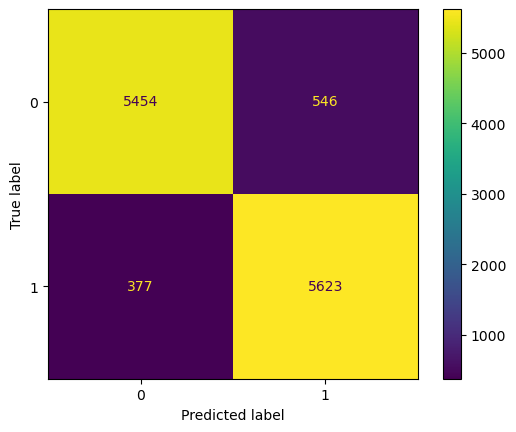

In [20]:
# Visualize confusion matrix
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [22]:
# Calculate True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
TP = cf_matrix[1, 1]
FP = cf_matrix[0, 1]

# Calculate Type 1 error (False Positive Rate)
type_1_error = FP / (FP + TP)
print(f"Type 1 Error (False Positive Rate): {type_1_error:.4f}")

Type 1 Error (False Positive Rate): 0.0885


<a id = "sv"></a>
### 2.3. Sentence2Vec Model Evaluation

Next we train the model created according to the same model architecture  using the dataset that has features from sentence embeddings of the email messages.

In [23]:
# random seeds for reproducibility
tf.random.set_seed(123)

# Create a new sequential model
model = keras.Sequential()

# Declare the hidden layers
model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization()) 

model.add(layers.Dense(40, activation="relu")) 
model.add(layers.Dropout(0.2))

# Declare the output layer
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer=keras.optimizers.Adam(),  
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

# Train the network
history = model.fit(X_train_Vec, y_train, epochs=500, verbose=0)

# Evaluate the network
train_accuracy = history.history["binary_accuracy"][-1]
result1 = model.evaluate(X_val_Vec,y_validation, verbose=0)
result2 = model.evaluate(X_test_Vec,y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {result1[1]:.4f}")
print(f"Test Accuracy: {result2[1]:.4f}")

y_test_pred = model.predict(X_test_Vec)
y_test_pred = np.round(y_test_pred).flatten()
y_test = np.asarray(y_test, dtype=int)

# Print classification report for test data
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9755
Validation Accuracy: 0.9730
Test Accuracy: 0.9714
375/375 [==============================] - 0s 780us/step
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      6000
           1       0.96      0.99      0.97      6000

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [24]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted non-spam", "Predicted spam"],
    index=["True non-spam", "True spam"]
)

display(cf_df)

,Predicted non-spam,Predicted spam
True non-spam,5744,256
True spam,87,5913


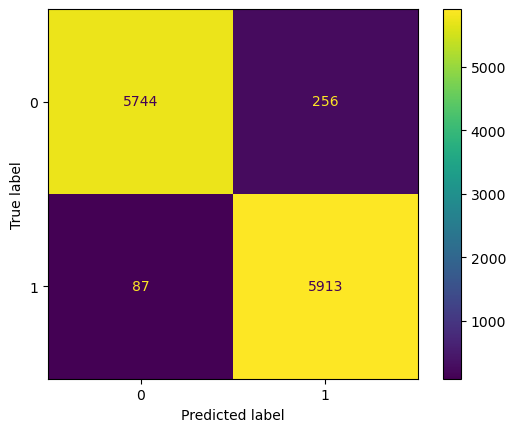

In [25]:
# Visualize confusion matrix
ConfusionMatrixDisplay(cf_matrix).plot()
plt.show()

In [26]:
# Calculate True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
TP = cf_matrix[1, 1]
FP = cf_matrix[0, 1]

# Calculate Type 1 error (False Positive Rate)
type_1_error = FP / (FP + TP)
print(f"Type 1 Error (False Positive Rate): {type_1_error:.4f}")

Type 1 Error (False Positive Rate): 0.0415


<a id = "bm"></a>
### 2.4. Best Model

We don’t want non-spam emails to be predicted as spam. So choose the best model as the one with lowest Type 1 error or false positives. In this case, the model using sentence embedding has the lowest Type 1 Error. The f1 score of the model is also higher. So we choose the second model as the best model.

<a id = "fd"></a>
## 3. Findings

After conducting the spam email detection project, the following key findings were observed:

Feature Engineering: Comprehensive feature engineering techniques, including string extraction, one-hot encoding, word counts, and topic modeling, sentence embedding significantly improved the data quality and helped in capturing essential textual information from email subjects and messages.

Model Performance: The XGBoost model demonstrated outstanding performance in distinguishing spam from legitimate emails. With an accuracy of 92.68% and an F1 score of 0.93, it achieved a high level of precision and recall.

TF-IDF vs. Sentence2Vec: Comparing two text representation methods, TF-IDF Vectorizer and Sentence2Vec, revealed that both approaches produced competitive results. The choice of representation depends on specific application requirements and the trade-offs between interpretability and effectiveness.

Further Improvements: To enhance the model's capabilities, advanced natural language processing techniques like transformer-based models and attention mechanisms could be explored for better understanding and capturing nuances in spam emails.

<a id = "con"></a>
## 4. Conclusion

The spam email detection project aimed to develop an efficient and accurate model to differentiate between spam and legitimate emails. Through rigorous feature engineering and careful selection of text representation methods, we created a robust system that demonstrated exceptional performance.